# Bayesian Neural Networks (BNNs)

In this notebook a Bayesian Neural network is trained on the CFB data to take bridge parameter as input an predict the code compliance factors.

### Resources
Here you can find nice explanations: 

1. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html

The following source was used as a stating point for the implementation:

2. https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825 

### Content
1. Data Import
2. Data Pre-processing
3. Setup and Train Model
4. Model Perfromance Evaluation
5. 1D Parameter Studies


In [1]:
#import necessary libraries
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from torch.utils.data import DataLoader, TensorDataset




## 1.  Data Import 

Data is imported from the defined csv file to a pandas Data Frame.

In [2]:
# Define path to csv-file
file_path="trainingData\\1001_CFB_xy.csv"

#import data from csv file
df = pd.read_csv(file_path)
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced,eta_min_c_stresses,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses
0,0,0,14152.309743,13160.448316,671.877268,271.205192,2592.503458,27.287790,10.197769,25.263594,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
1,1,1,8837.220070,14326.857508,397.206564,392.509172,2174.579147,13.526673,28.214886,16.686438,...,9643.077169,0.000000,-576.609344,bot,54.0,1.004969,9751.244141,4146.510742,-349.060303,eta_y_top_stresses
2,2,2,7796.803368,10387.623139,378.608748,496.703692,2499.310838,13.184702,28.695437,26.623659,...,10211.033545,2940.897298,0.000000,top,45.0,0.736744,10312.987305,205.777237,-436.707275,eta_y_bot_stresses
3,3,3,15476.105221,16753.589316,406.201522,506.925036,4666.279702,14.948656,10.629952,23.855850,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
4,4,4,15734.234806,4752.154452,533.287170,1098.176839,2413.433684,28.295942,21.539489,29.983721,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,12675.404601,15242.173399,324.831569,613.851078,4975.947365,22.126147,11.958004,20.337492,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
9996,9996,9996,14797.994064,10913.617015,979.049978,1080.051034,3182.345390,23.641662,13.978370,23.028303,...,10449.788292,12359.866670,0.000000,bot,0.0,2.835257,10717.580078,13526.613281,-931.291443,eta_y_bot_stresses
9997,9997,9997,3812.489535,10660.380260,258.838063,1176.084953,2313.743479,21.085486,18.536990,16.966978,...,8364.845044,2527.652893,0.000000,bot,0.0,4.254149,9261.632812,45.963791,-211.776596,eta_y_bot_stresses
9998,9998,9998,8959.750469,6396.358266,815.418272,575.322936,3867.503346,18.311154,10.204305,13.407149,...,6124.513040,8107.741424,0.000000,bot,11.0,2.855744,6281.462891,4356.798828,-772.501526,eta_y_top_stresses


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'L', 'b1', 't_p', 't_w', 'h_w', 'd1_plate',
       'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls',
       'fcc', 's', 'beta', 'h_G', 'alpha_l', 'h_v', 'l_v', 'oo', 'uu',
       'd3_plate', 'd3_walls', 'd2_walls', 'fsy', 'fsu_fac', 'esu', 'ecu',
       'gamma_E', 'phi_k', 'q_Gl', 'b_Bs', 'Q_k', 'l_sec', 'b_sec1_b1',
       'b_sec2_b1', 'h_S1_3', 'h_S7_9', 'mesh_size_factor', 'b2', 'b_sec1_b2',
       'b_sec2_b2', 'fsu', 'eta_min_s', 'x_s', 'y_s', 'z_s', 'Location_s',
       'GP_count_s', 'eta_min_c', 'x_c', 'y_c', 'z_c', 'Location_c',
       'GP_count_c', 'eta_min_shear', 'x_c_shear', 'y_c_shear', 'z_c_shear',
       'Location_c_shear', 'element_count_shear', 'eta_min_shear_reduced',
       'x_c_shear_reduced', 'y_c_shear_reduced', 'z_c_shear_reduced',
       'Location_c_shear_reduced', 'element_count_shear_reduced',
       'eta_min_c_stresses', 'x_c_stresses', 'y_c_stresses', 'z_c_stresses',
       'Location_c_stresses'],
      dtype='ob

In [4]:
df = df[(df['eta_min_c'] != 0)]
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced,eta_min_c_stresses,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses
1,1,1,8837.220070,14326.857508,397.206564,392.509172,2174.579147,13.526673,28.214886,16.686438,...,9643.077169,0.000000,-576.609344,bot,54.0,1.004969,9751.244141,4146.510742,-349.060303,eta_y_top_stresses
2,2,2,7796.803368,10387.623139,378.608748,496.703692,2499.310838,13.184702,28.695437,26.623659,...,10211.033545,2940.897298,0.000000,top,45.0,0.736744,10312.987305,205.777237,-436.707275,eta_y_bot_stresses
8,8,8,9136.818664,11327.434726,676.356536,655.628521,3931.738859,26.907880,23.107287,13.499978,...,11006.490742,8481.190143,-1000.724992,bot,0.0,4.183982,11191.788086,8201.057617,-1187.998901,eta_y_bot_stresses
9,9,9,8766.099931,17385.636290,1065.785788,583.227595,4793.462227,23.508880,28.995123,15.462622,...,9466.478960,7912.837549,0.000000,bot,31.0,3.805277,12435.707031,3930.807617,-1022.284302,eta_y_top_stresses
10,10,10,10735.724425,18546.687766,249.368731,575.679256,4499.980283,24.024013,27.949637,15.460295,...,5997.998823,10040.301780,0.000000,bot,221.0,0.998294,6172.142578,9971.167969,-201.869919,eta_y_bot_stresses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,9994,11952.015152,13077.414449,714.481628,1002.857065,4609.457880,29.764155,29.438881,23.647009,...,12759.820099,10045.852545,0.000000,bot,0.0,2.401928,12943.182617,10821.897461,-666.849548,eta_y_bot_stresses
9996,9996,9996,14797.994064,10913.617015,979.049978,1080.051034,3182.345390,23.641662,13.978370,23.028303,...,10449.788292,12359.866670,0.000000,bot,0.0,2.835257,10717.580078,13526.613281,-931.291443,eta_y_bot_stresses
9997,9997,9997,3812.489535,10660.380260,258.838063,1176.084953,2313.743479,21.085486,18.536990,16.966978,...,8364.845044,2527.652893,0.000000,bot,0.0,4.254149,9261.632812,45.963791,-211.776596,eta_y_bot_stresses
9998,9998,9998,8959.750469,6396.358266,815.418272,575.322936,3867.503346,18.311154,10.204305,13.407149,...,6124.513040,8107.741424,0.000000,bot,11.0,2.855744,6281.462891,4356.798828,-772.501526,eta_y_top_stresses


In [5]:
df = df[(df['eta_min_c'] != 0) | (df['eta_min_s'] != 0) | (df['eta_min_shear'] != 0)]
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced,eta_min_c_stresses,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses
1,1,1,8837.220070,14326.857508,397.206564,392.509172,2174.579147,13.526673,28.214886,16.686438,...,9643.077169,0.000000,-576.609344,bot,54.0,1.004969,9751.244141,4146.510742,-349.060303,eta_y_top_stresses
2,2,2,7796.803368,10387.623139,378.608748,496.703692,2499.310838,13.184702,28.695437,26.623659,...,10211.033545,2940.897298,0.000000,top,45.0,0.736744,10312.987305,205.777237,-436.707275,eta_y_bot_stresses
8,8,8,9136.818664,11327.434726,676.356536,655.628521,3931.738859,26.907880,23.107287,13.499978,...,11006.490742,8481.190143,-1000.724992,bot,0.0,4.183982,11191.788086,8201.057617,-1187.998901,eta_y_bot_stresses
9,9,9,8766.099931,17385.636290,1065.785788,583.227595,4793.462227,23.508880,28.995123,15.462622,...,9466.478960,7912.837549,0.000000,bot,31.0,3.805277,12435.707031,3930.807617,-1022.284302,eta_y_top_stresses
10,10,10,10735.724425,18546.687766,249.368731,575.679256,4499.980283,24.024013,27.949637,15.460295,...,5997.998823,10040.301780,0.000000,bot,221.0,0.998294,6172.142578,9971.167969,-201.869919,eta_y_bot_stresses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9994,9994,11952.015152,13077.414449,714.481628,1002.857065,4609.457880,29.764155,29.438881,23.647009,...,12759.820099,10045.852545,0.000000,bot,0.0,2.401928,12943.182617,10821.897461,-666.849548,eta_y_bot_stresses
9996,9996,9996,14797.994064,10913.617015,979.049978,1080.051034,3182.345390,23.641662,13.978370,23.028303,...,10449.788292,12359.866670,0.000000,bot,0.0,2.835257,10717.580078,13526.613281,-931.291443,eta_y_bot_stresses
9997,9997,9997,3812.489535,10660.380260,258.838063,1176.084953,2313.743479,21.085486,18.536990,16.966978,...,8364.845044,2527.652893,0.000000,bot,0.0,4.254149,9261.632812,45.963791,-211.776596,eta_y_bot_stresses
9998,9998,9998,8959.750469,6396.358266,815.418272,575.322936,3867.503346,18.311154,10.204305,13.407149,...,6124.513040,8107.741424,0.000000,bot,11.0,2.855744,6281.462891,4356.798828,-772.501526,eta_y_top_stresses


## 2. Pre-process Data

Pre-Processing Steps
- select x and y columns (inputs and outputs)
- split data set in trianing and test set
- transform data to same range with MinMaxScaler
- transform scaled data to troch tensors

In [6]:
###### select input and ouputs ######

#x_names = ['L', 'b1',  't_p', 't_w', 'h_w'] #5 important features
x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 's', 'beta', 'h_G'] # all 16 features
# Select perfromances
y_names=['eta_min_c']


# Get relevant columns and transorm to torch tensors
x_data_df=df[x_names]
y_data_df=df[y_names]


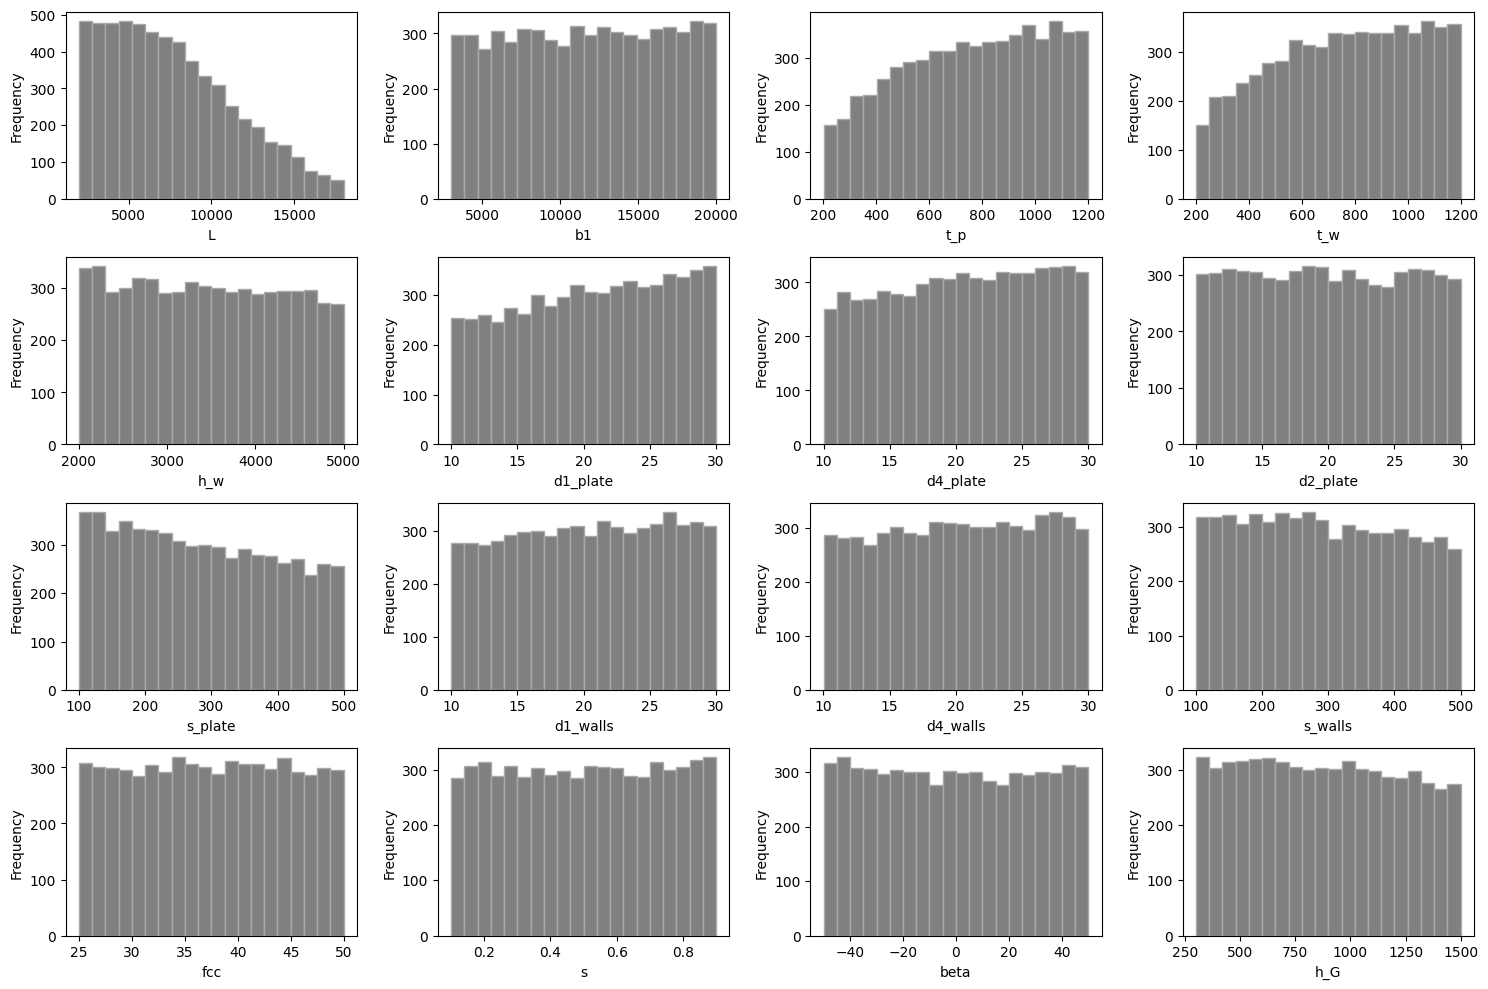

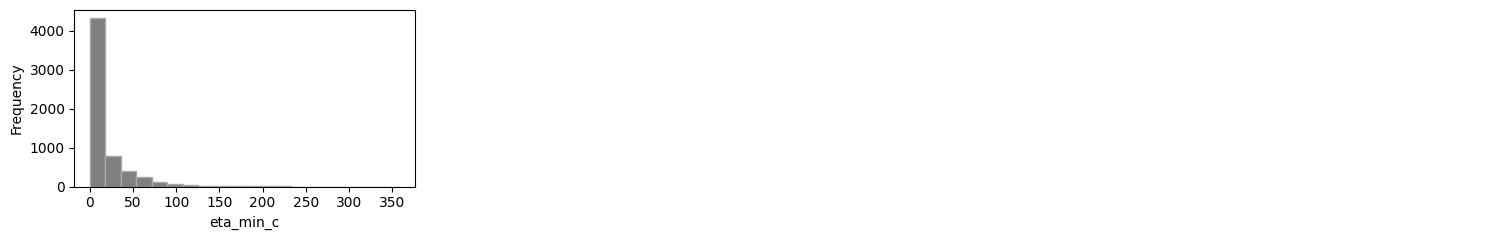

In [7]:
from plotting import hist_matrix
hist_matrix(x_data_df)
hist_matrix(y_data_df)

Training Dataset:  (3846, 16) (3846, 1)
Validation Dataset:  (962, 16) (962, 1)
Test Dataset:  (1202, 16) (1202, 1)


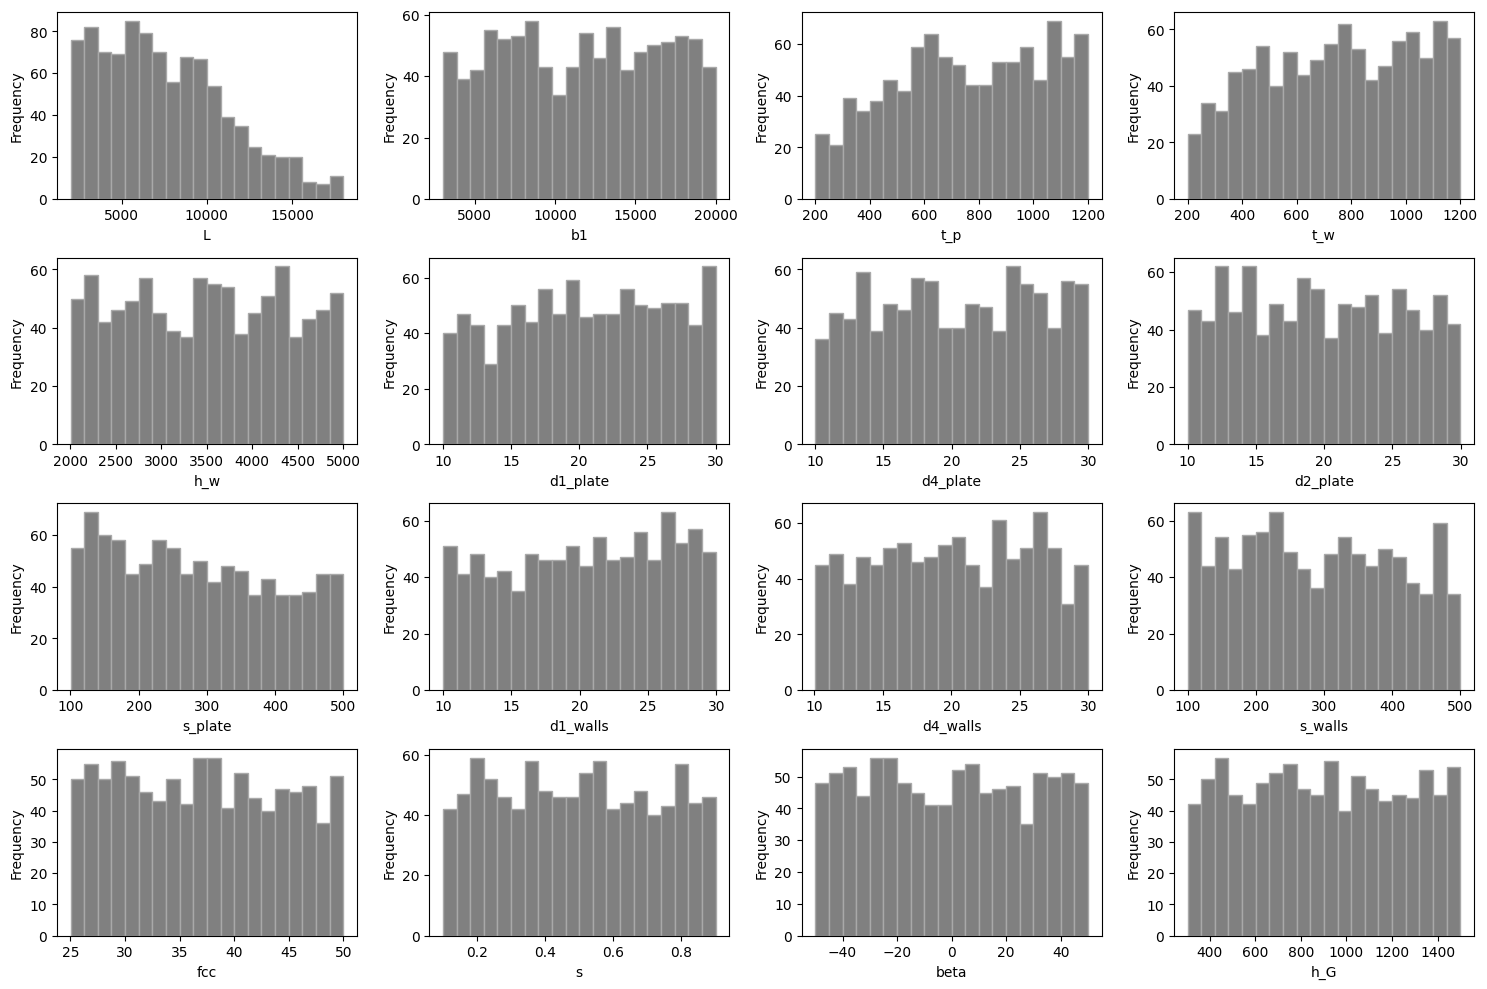

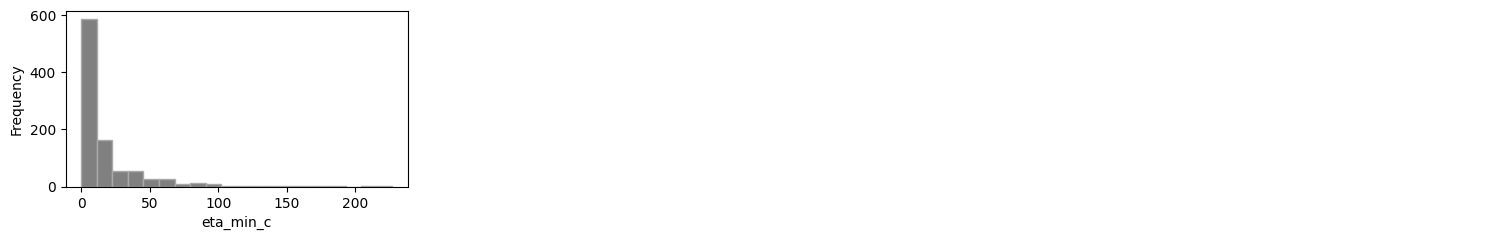

In [8]:
####### data set split #######


# split the data in training and test set
test_size = 0.2 #define test split size
x_train_full_df, x_test_df, y_train_full_df, y_test_df = train_test_split(x_data_df, y_data_df, test_size=test_size, random_state=42)

# split the training data in training and validation set
val_size = 0.2 #define val split size
x_train_df, x_val_df, y_train_df, y_val_df = train_test_split(x_train_full_df, y_train_full_df, test_size=val_size, random_state=42)

# split the data in training and test set

# transfrom to numpy arrays
x_train_np = x_train_df.values
y_train_np = y_train_df.values
x_val_np = x_val_df.values
y_val_np = y_val_df.values
x_test_np = x_test_df.values
y_test_np = y_test_df.values

#Print shapes of the splitted data sets
print('Training Dataset: ',x_train_df.shape,y_train_df.shape )
print('Validation Dataset: ',x_val_df.shape, y_val_df.shape)
print('Test Dataset: ',x_test_df.shape,y_test_df.shape)


#plot training data
hist_matrix(x_val_df)
hist_matrix(y_val_df)


In [9]:
###### Scaling of data ######

# INPUT we scale to a range 0,1
# Initialize the MinMaxScaler and fit it on the training data
# Note: MinMaxScaler  scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
# Note: MinMaxScaler doesn’t reduce the effect of outliers, but it linearly scales them down into a fixed range
# Note: MinMaxScaler is sufficient as our data is uniformily distributed for the case when we have non-uniform distirbuted data (as sampled with )

#initialize scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# fit scaler on total data set
scaler.fit(x_data_df)

# scale training data
x_train_scaled_np = scaler.transform(x_train_df)
x_train_scaled_df=pd.DataFrame(data=x_train_scaled_np, columns=scaler.get_feature_names_out())

# Scale the validation data using the same scaler
x_val_scaled_np = scaler.transform(x_val_df)
x_val_scaled_df=pd.DataFrame(data=x_val_scaled_np, columns=scaler.get_feature_names_out())

# Scale the validation data using the same scaler
x_test_scaled_np = scaler.transform(x_test_df)
x_test_scaled_df=pd.DataFrame(data=x_test_scaled_np, columns=scaler.get_feature_names_out())

#plot scaled data
x_train_scaled_df.describe()

,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,s_plate,d1_walls,d4_walls,s_walls,fcc,s,beta,h_G
count,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000,3846.000000
mean,0.350768,0.505354,0.557761,0.547565,0.488458,0.536404,0.521731,0.500145,0.468689,0.510742,0.509276,0.482430,0.505470,0.502159,0.496298,0.484848
std,0.237993,0.290965,0.271769,0.273215,0.288443,0.286398,0.285098,0.287962,0.287903,0.285046,0.289035,0.285236,0.288554,0.291400,0.292261,0.284170
min,0.000000,0.000839,0.000000,0.000760,0.000059,0.000000,0.000000,0.000117,0.000000,0.000070,0.000000,0.000493,0.000090,0.000000,0.000372,0.000000
25%,0.153476,0.253187,0.336836,0.330400,0.238056,0.299895,0.283016,0.251506,0.216367,0.265013,0.262962,0.235942,0.261644,0.247011,0.241140,0.240921
50%,0.317211,0.507889,0.575515,0.559258,0.482384,0.553328,0.531550,0.499293,0.453527,0.512516,0.513107,0.470530,0.507422,0.501717,0.490890,0.479285
75%,0.515312,0.760304,0.788150,0.778639,0.738438,0.783063,0.766318,0.752287,0.714387,0.760302,0.759400,0.727362,0.756341,0.758906,0.752153,0.723903
max,0.999013,1.000000,0.999788,0.999749,0.999908,0.999944,0.999559,1.000000,0.999872,1.000000,1.000000,0.999957,1.000000,0.999821,1.000000,0.999692


In [10]:
# Note instead of scaling the data here I inlcuded a mean squared log error loss in my training which has the same effect but no need for preprocessing and postprocing of training input and prediction output
# ###### Scaling of data ######

# # Y (Output) we scale with log(y)
# #m.log(y_train_np)

# # Applying y_trans=log_e(y+1) function/ transformation
# y_train_transf_np = np.log(y_train_np + 1) # log_e
# y_train_transf_df=pd.DataFrame(y_train_transf_np, columns=y_names)

# y_val_transf_np = np.log(y_val_np + 1) # log_e
# y_val_transf_df=pd.DataFrame(y_val_transf_np, columns=y_names)


# hist_matrix(y_train_transf_df)


# ##### convert to troch tensors ######

# # convert data to toch tensors (as needed format for BNN model)
# x_train_scaled_tensor=torch.tensor(x_train_scaled_df.values, dtype=torch.float32)
# y_train_transf_tensor=torch.tensor(y_train_transf_df.values, dtype=torch.float32)

# x_val_scaled_tensor=torch.tensor(x_val_scaled_df.values, dtype=torch.float32)
# y_val_transf_tensor=torch.tensor(y_val_transf_df.values, dtype=torch.float32)

In [11]:
##### convert to troch tensors ######

# convert data to toch tensors (as needed format for BNN model)
#training data
x_train_scaled_tensor=torch.tensor(x_train_scaled_df.values, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train_df.values, dtype=torch.float32)

#validation data
x_val_scaled_tensor=torch.tensor(x_val_scaled_df.values, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val_df.values, dtype=torch.float32)

#test data
x_test_scaled_tensor=torch.tensor(x_test_scaled_df.values, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test_df.values, dtype=torch.float32)


## 3. Setup and Train Model

- Define NN Architecture
- Define Losses
- Trianing Loop
- Plot loss developement during trianing
- save trained model

In [12]:
# define NN architecture
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=20),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=20),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=1),
    nn.ReLU()
)


#initialize error tracking lists
mse_list=[]
mse_val_list=[]

msle_list=[]
msle_val_list=[]

mean_mse_list=[]
mean_mse_val_list=[]

weighted_mse_list = []
weighted_mse_val_list = []

rmse_list=[]
rmse_val_list=[]

kl_list=[]
kl_val_list=[]

mape_list=[]
mape_val_list=[]

custom_loss_list = []
custom_loss_val_list = []


In [13]:
##### Losses ######

# define kl weight for weighing of kl_loss in total loss function
# Note: depending which loss function are used different kl_weights should be chosen...msle is of a multiple magnitude smaller than the mse, so the kl_weight hast to also be adapter when we use that weight.
# Note: with mse loss 0.01, with msle loss 0.0001
kl_weight = 0.001
# get kl loss
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)

# get mse loss
mse_loss = nn.MSELoss()

#define custom loss function
def weighted_mse_loss(predictions, targets, importance_range=(0, 5), high_weight=10):
    # Calculate the basic MSE loss
    basic_mse = (predictions - targets) ** 2

    # Apply a higher weight to errors within the specified range
    weights = torch.ones_like(targets)
    weights[(targets >= importance_range[0]) & (targets <= importance_range[1])] = high_weight

    # Calculate the weighted MSE loss
    weighted_mse = basic_mse * weights
    return weighted_mse.mean()

# mean_squared_log_error
def msle_loss(pred, targets, base='e'):
    
    if base=='e':
        pred_scaled = torch.log(pred + 1) 
        targets_scaled = torch.log(targets + 1) 
    elif base ==10 or base =='10':
        pred_scaled = torch.log10(pred + 1) 
        targets_scaled = torch.log10(targets + 1) 
    else:
        raise Exception('Invalid input for base parameter.')

    # Calculate the MSE loss
    msle = ((pred_scaled - targets_scaled ) ** 2).mean()

    return msle

# Define MAPE loss function (Mean Absolute Percentage Error)
def mape_loss(predictions, targets, eps=1e-6):
    # Add epsilon to avoid division by zero in case y_i is 0
    mape = torch.mean(torch.abs((targets - predictions) / (targets + eps))) * 100
    return mape

# define custom loss functon which is a combination of the MeanPrecentageError above acertain threshhold
# and the absolute error below the threshhold.
def custom_loss(predictions, targets, threshold=0.5, alpha=1, beta=1):
    # Calculate absolute error
    abs_error = torch.abs(targets - predictions)
    
    # Calculate percentage error for targets greater than threshold
    percentage_error = torch.abs((targets - predictions) / (targets + 1e-6))  # Add small epsilon to avoid division by zero
    
    # Create a mask for when targets are less than or equal to the threshold
    below_threshold_mask = targets <= threshold
    
    # Apply alpha * absolute error for targets <= threshold
    loss_below_threshold = alpha * abs_error[below_threshold_mask]
    
    # Apply beta * percentage error for targets > threshold
    loss_above_threshold = beta * percentage_error[~below_threshold_mask]
    
    # Combine the two parts of the loss
    total_loss = torch.cat((loss_below_threshold, loss_above_threshold)).mean()
    
    return total_loss

#get optimizer
learning_rate=0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [14]:
# define epochs, and the training data, and the batch size
epochs = 100
batch_size = 32
# Shuffle is set to True to randomize the order of training data at each epoch

train_dataset = TensorDataset(x_train_scaled_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# x = x_train_scaled_tensor
# y = y_train_transf_tensor
with_stochasticPrediction=False

#training loop
for step in range(epochs):
    
    model.train()

    epoch_mse = []
    epoch_msle = []
    epoch_weighted_mse = []
    epoch_rmse = []
    epoch_kl = []
    epoch_mape = []
    epoch_custom = []

    for x, y in train_loader:
        y_pred = model(x)

        if with_stochasticPrediction:
            y_pred_mean_np, y_pred_std_np, y_pred_n_times=bnn_predict_with_uncertainty(model, x, n=100)
            y_pred_mean_tensor=torch.tensor(y_pred_mean_np, dtype=torch.float32)
            mean_mse = mse_loss(y_pred_mean_tensor, y)
            mean_mse_list.append(mean_mse.item())
            
        #standard mse, rmse loss
        mse = mse_loss(y_pred, y)
        epoch_mse.append(mse.item())
        # mse_list.append(mse.item())
        rmse = torch.sqrt(mse)
        epoch_rmse.append(rmse.item())

        #msle loss
        msle = msle_loss(y_pred, y,base='10')
        epoch_msle.append(msle.item())
        # msle_list.append(msle.item())

        # weighted MSE loss
        weighted_mse = weighted_mse_loss(y_pred, y, importance_range=(0.1, 3), high_weight=100)
        epoch_weighted_mse.append(weighted_mse.item())
        # custom_mse_list.append(custom_mse.item())

        # mape
        mape= mape_loss(y_pred, y)
        epoch_mape.append(mape.item())


        # # Custom loss
        custom = custom_loss(y_pred, y, threshold=0.5, alpha=1, beta=1)
        epoch_custom.append(custom.item())

        #kl_divergence loss
        kl = kl_loss(model)
        epoch_kl.append(kl.item())
        # kl_list.append(kl.item())

        # Add individual losses weighted to single loss
        cost = rmse + kl_weight*kl
        cost_log=msle + kl_weight*kl
        cost_weigthed_mse= weighted_mse + kl_weight*kl
        cost_mape = mape + kl_weight*kl
        cost_custom=custom + kl_weight*kl
        
        optimizer.zero_grad()
        cost.backward() #Specify loss that should be used here
        optimizer.step()

    # Calculate mean losses for the epoch (on training data) and save in loss lists
    mse_list.append(np.mean(epoch_mse))
    rmse_list.append(np.mean(epoch_rmse))
    msle_list.append(np.mean(epoch_msle))
    weighted_mse_list.append(np.mean(epoch_weighted_mse))
    kl_list.append(np.mean(epoch_kl))
    mape_list.append(np.mean(epoch_mape))
    custom_loss_list.append(np.mean(epoch_custom))

    # Calculate validation loss calculation and save in loss tracking lists
    model.eval()
    with torch.no_grad():
        y_val_pred = model(x_val_scaled_tensor)

        #standard mse, rmse loss
        mse_val = mse_loss(y_val_pred, y_val_tensor)
        mse_val_list.append(mse_val.item())
        rmse_val = torch.sqrt(mse_val)
        rmse_val_list.append(rmse_val.item())

        #msle los
        msle_val = msle_loss(y_val_pred, y_val_tensor, base='10')
        msle_val_list.append(msle_val.item())

        # weighted MSE loss
        weighted_mse_val = weighted_mse_loss(y_val_pred, y_val_tensor, importance_range=(0, 4), high_weight=10)
        weighted_mse_val_list.append(weighted_mse_val.item())

        # mape loss
        mape_val = mape_loss(y_val_pred, y_val_tensor)
        mape_val_list.append(mape_val.item())

        # custom loss
        custom_val = custom_loss(y_val_pred, y_val_tensor, threshold=0.5, alpha=1, beta=1)
        custom_loss_val_list.append(custom_val.item())
        

            

    # verbalise
    if step % 50 == 0:
        if with_stochasticPrediction:
            print(f'Step {step}, On Training Set: MSE: {mse.item():.2f}, Mean MSE: {mean_mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, '
                f'Weighted MSE: {weighted_mse.item():.2f}, MAPE: {mape.item():.2f}, Custom Loss: {custom.item():.2f}; '
                'On Validation Set:', f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Weighted MSE: {weighted_mse_val.item():.2f}, '
                f'Val MAPE: {mape_val.item():.2f}, Val Custom Loss: {custom_val.item():.2f}')
        else: 
            print(f'Step {step}, On Training Set: MSE: {mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, '
                f'Weighted MSE: {weighted_mse.item():.2f}, MAPE: {mape.item():.2f}, Custom Loss: {custom.item():.2f}; '
                'On Validation Set:', f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Weighted MSE: {weighted_mse_val.item():.2f}, '
                f'Val MAPE: {mape_val.item():.2f}, Val Custom Loss: {custom_val.item():.2f}')

    

    


print('Training is finished. The final losses:') 
if with_stochasticPrediction:
    print(f'Step {step}, On Training Set: MSE: {mse.item():.2f}, Mean MSE: {mean_mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, '
          f'Weighted MSE: {weighted_mse.item():.2f}, MAPE: {mape.item():.2f}, Custom Loss: {custom.item():.2f}, '
          'On Validation Set:', f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Weighted MSE: {weighted_mse_val.item():.2f}, '
          f'Val MAPE: {mape_val.item():.2f}, Val Custom Loss: {custom_val.item():.2f}')
else:
    print(f'Step {step}, On Training Set: MSE: {mse.item():.2f}, MSLE: {msle.item():.2f}, KL: {kl.item():.2f}, RMSE: {rmse.item():.2f}, '
          f'Weighted MSE: {weighted_mse.item():.2f}, MAPE: {mape.item():.2f}, Custom Loss: {custom.item():.2f}, '
          'On Validation Set:', f'Val MSE: {mse_val.item():.2f}, Val MSLE: {msle_val.item():.2f}, Val RMSE: {rmse_val.item():.2f}, Val Weighted MSE: {weighted_mse_val.item():.2f}, '
          f'Val MAPE: {mape_val.item():.2f}, Val Custom Loss: {custom_val.item():.2f}')

Step 0, On Training Set: MSE: 88.78, MSLE: 0.29, KL: 1.15, RMSE: 9.42, Weighted MSE: 583.33, MAPE: 1558.04, Custom Loss: 1.95; On Validation Set: Val MSE: 1057.99, Val MSLE: 0.37, Val RMSE: 32.53, Val Weighted MSE: 1066.26, Val MAPE: 173.11, Val Custom Loss: 0.84
Step 50, On Training Set: MSE: 96.44, MSLE: 0.03, KL: 25.38, RMSE: 9.82, Weighted MSE: 97.21, MAPE: 30.61, Custom Loss: 0.31; On Validation Set: Val MSE: 131.22, Val MSLE: 0.06, Val RMSE: 11.46, Val Weighted MSE: 166.22, Val MAPE: 178.48, Val Custom Loss: 0.84
Training is finished. The final losses:
Step 99, On Training Set: MSE: 9.29, MSLE: 0.02, KL: 37.46, RMSE: 3.05, Weighted MSE: 87.21, MAPE: 43.34, Custom Loss: 0.43, On Validation Set: Val MSE: 84.40, Val MSLE: 0.04, Val RMSE: 9.19, Val Weighted MSE: 95.98, Val MAPE: 122.25, Val Custom Loss: 0.52


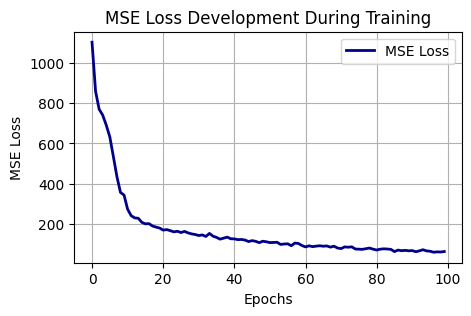

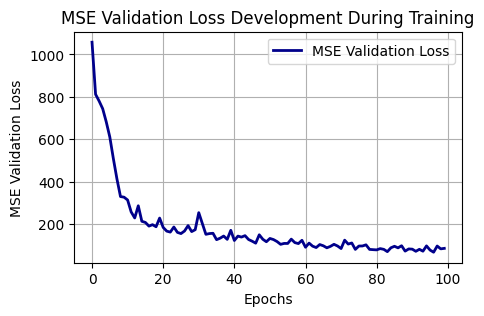

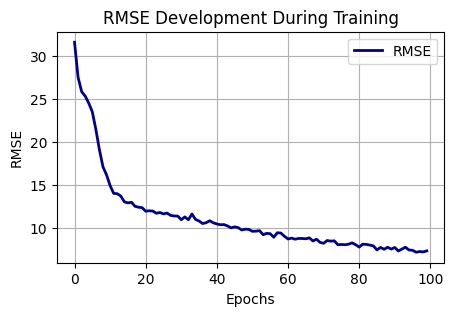

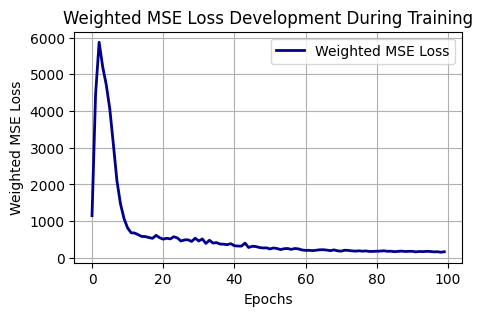

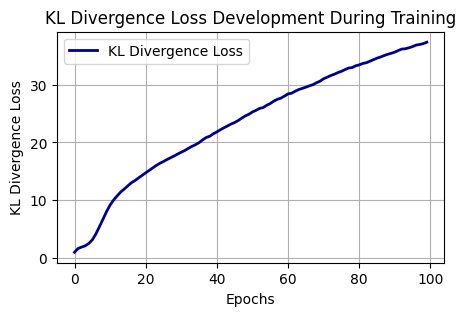

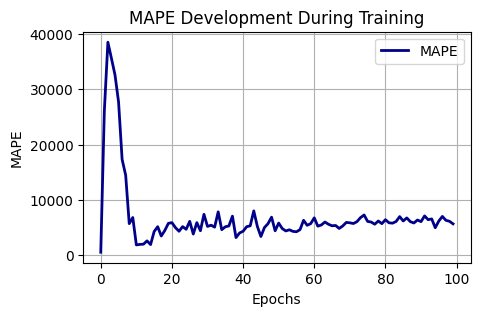

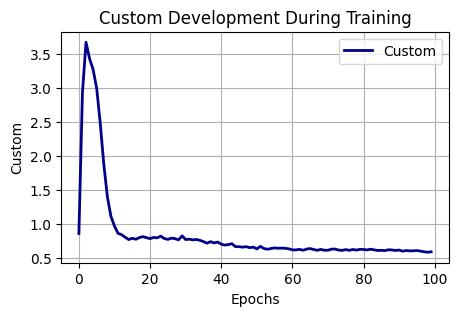

In [15]:
from plotting import plot_loss_development

loss_lists = [mse_list, mse_val_list, rmse_list, weighted_mse_list, kl_list, mape_list, custom_loss_list]
# loss_lists = [mse_list, mean_mse_list, kl_list, rmse_list, weighted_mse_list]
loss_names = ['MSE Loss', 'MSE Validation Loss', 'RMSE', 'Weighted MSE Loss', 'KL Divergence Loss', 'MAPE', 'Custom']
# loss_names = ['MSE Loss', 'Mean MSE Loss', 'KL Divergence Loss', 'RMSE', 'Custom MSE Loss']

# Define a path to save the plots, if needed
save_path = 'trainedModels' # Example path, change it as needed

plot_loss_development(loss_lists, loss_names, save_path, color='darkblue', model_name='TestModel', figsize=(5, 3))

In [16]:
#define model name:
# name rule: batch_filter_modelsize_lossfunction_epochs_iteration
model_name='1001_no0_small_cost_100_1'

In [17]:
####### save model #######
# define model name

#saving the whole model
torch.save(model, 'trainedModels\\'+model_name+'.pth')

#saving just the weights and biases
#torch.save(model.state_dict(), 'trainedModels\\'+name_training_run+'.pth')

## 4. Model evaluation
- load model
- On training data:

    a. evaluate prediction perfromance

    b. evaluate uncertanty calibration

- On validation data:

    a. evaluate prediction perfromance

    b. evaluate uncertanty calibration

- On test data: 

    a. evaluate prediction perfromance

    b. evaluate uncertanty calibration
    


In [18]:
## load a model
#model_name=
model = torch.load('trainedModels\\'+model_name+'.pth')

model.eval() # sets the model to evaluation mode, which affects layers like dropout and batch normalization that behave differently during training and inference.
model

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=20, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=20, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=20, out_features=1, bias=True)
  (5): ReLU()
)

In [27]:
from plotting import plot_true_vs_pred, single_para_strudy_perf
from MLmodel import bnn_predict_with_uncertainty, calculate_rmse, filter_values_within_range, calculate_mape, calculate_custom_loss

In [64]:
# initialize hyperparameter table/ dict

#eval_dict={'model':[], 
#          'rmse_train_all':[], 'rmse_train_crit1':[],'rmse_train_crit2':[],'rmse_train_crit3':[],'rmse_train_crit4':[]}

# initialise whole dict (only once per study)
eval_dict={}


In [65]:
# initialize model dict
eval_dict[model_name]={}
eval_dict[model_name]['training_set_performance']={}
eval_dict[model_name]['validation_set_performance']={}

### On training data



In [66]:
# make predictions and caluclate mean 
##### make predictions ####3
# Define number of predictions
n_predictions = 1000
# Perfrom multiple predictions on data --> get mean and std for each data point
y_train_mean_pred_np, y_train_std_pred_np, y_train_pred_n_times = bnn_predict_with_uncertainty(model, x_train_scaled_tensor, n=n_predictions, log_transform_back=False)

In [67]:
y_train_mean_pred_np

array([[ 2.2221391],
       [ 6.1861587],
       [11.594554 ],
       ...,
       [ 2.7410917],
       [14.258024 ],
       [ 6.823528 ]], dtype=float32)

In [68]:
#### Calculate comparison metrics

y_true=y_train_np,
y_pred=y_train_mean_pred_np
dict_name='training_set_performance'

#### RMSE and MAPE for different ranges
#all
rmse_train_all = calculate_rmse(y_true=y_train_np, y_pred=y_train_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_all']=rmse_train_all
mape_train_all=calculate_mape(y_train_np, y_train_mean_pred_np)
eval_dict[model_name][dict_name]['mape_all']=mape_train_all
#critical 1 range (0.5-1.5)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=0.5, ub=1.5)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit1']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit1']=mape
#critical 2 range (1.5-3)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=1.5, ub=3)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit2']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit2']=mape
#critical 3 range (3-10)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=2, ub=10)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit3']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit3']=mape
#critical 4 range (10-500)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=10, ub=500)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit4']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit4']=mape

# Curstom loss calc
custom=calculate_custom_loss(y_true=y_train_np, y_pred=y_train_mean_pred_np, threshold=0.5, alpha=1, beta=1)
eval_dict[model_name][dict_name]['custom']=custom


print(eval_dict)

{'1001_no0_small_cost_100_1': {'training_set_performance': {'rmse_all': 6.859883773694138, 'mape_all': 6135.546833005438, 'rmse_crit1': 2.0861455924296877, 'mape_crit1': 212.2483187809243, 'rmse_crit2': 1.867678265311806, 'mape_crit2': 56.85787246867894, 'rmse_crit3': 2.7371280571490946, 'mape_crit3': 36.573542240374024, 'rmse_crit4': 9.996053613980965, 'mape_crit4': 21.25296498613713, 'custom': 0.5452638670735876}, 'validation_set_perfromance': {}}}


In [69]:
# uncertanty evaluation

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Define a range of confidence levels
confidence_levels = np.linspace(0, 1, 100)
coverages = []

# Compute prediction intervals (e.g., 95% confidence intervals) (Assumption that the predictive distribution is a normal dirtsibution)
for confidence_level in confidence_levels:
    z = norm.ppf((1 + confidence_level) / 2)  # z-score for the confidence level
    prediction_intervals = np.array([
        [meanPred - z * std, meanPred + z * std]
        for meanPred, std in zip(y_train_mean_pred_np, y_train_std_pred_np)
    ])

    # Check if actual values fall within prediction intervals
    within_intervals = np.array([
        interval[0] <= y_true <= interval[1]
        for interval, y_true in zip(prediction_intervals, y_train_np)
    ])
    
    # Proportion of times actual values fall within prediction intervals
    coverage = np.mean(within_intervals)
    coverages.append(coverage)

#print(coverages)

from sklearn.metrics import mean_squared_error
# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(confidence_levels - coverages))
#print("Expected Calibration Error (ECE):", ece)
eval_dict[model_name][dict_name]['ECE']=ece

# Calculate Total Calibration Error (TCE)
tce = np.sum(np.abs(confidence_levels - coverages))
# print("Total Calibration Error (TCE):", tce)
eval_dict[model_name][dict_name]['TCE']=tce

# Calculate Bias (Positive for Overconfidence, Negative for Underconfidence)
bias = np.sum(confidence_levels - coverages)
# print("Calibration Bias:", bias)
eval_dict[model_name][dict_name]['CB']=bias

print(eval_dict)

{'1001_no0_small_cost_100_1': {'training_set_performance': {'rmse_all': 6.859883773694138, 'mape_all': 6135.546833005438, 'rmse_crit1': 2.0861455924296877, 'mape_crit1': 212.2483187809243, 'rmse_crit2': 1.867678265311806, 'mape_crit2': 56.85787246867894, 'rmse_crit3': 2.7371280571490946, 'mape_crit3': 36.573542240374024, 'rmse_crit4': 9.996053613980965, 'mape_crit4': 21.25296498613713, 'custom': 0.5452638670735876, 'ECE': 0.24778471138845556, 'TCE': 24.778471138845557, 'CB': 24.778471138845557}, 'validation_set_perfromance': {}}}


In [70]:
print(eval_dict)

{'1001_no0_small_cost_100_1': {'training_set_performance': {'rmse_all': 6.859883773694138, 'mape_all': 6135.546833005438, 'rmse_crit1': 2.0861455924296877, 'mape_crit1': 212.2483187809243, 'rmse_crit2': 1.867678265311806, 'mape_crit2': 56.85787246867894, 'rmse_crit3': 2.7371280571490946, 'mape_crit3': 36.573542240374024, 'rmse_crit4': 9.996053613980965, 'mape_crit4': 21.25296498613713, 'custom': 0.5452638670735876, 'ECE': 0.24778471138845556, 'TCE': 24.778471138845557, 'CB': 24.778471138845557}, 'validation_set_perfromance': {}}}


### on validation set

In [72]:
##### make predictions ####
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_val_mean_pred_np, y_val_std_pred_np, y_val_pred_n_times = bnn_predict_with_uncertainty(model, x_val_scaled_tensor, n=n_predictions,log_transform_back=False)
y_val_mean_pred_np

array([[2.73885846e+00],
       [2.73885846e+00],
       [2.42073860e+01],
       [5.71008825e+00],
       [5.97730303e+00],
       [3.15968657e+00],
       [6.84224606e+00],
       [4.20386925e+01],
       [3.77078400e+01],
       [7.57599716e+01],
       [2.76569653e+00],
       [3.75152359e+01],
       [4.56719093e+01],
       [8.21353912e+01],
       [2.73885846e+00],
       [2.80215979e+00],
       [4.02150497e+01],
       [1.07666664e+01],
       [2.42304077e+01],
       [7.00109482e+00],
       [1.35829296e+01],
       [2.86734695e+01],
       [4.70454741e+00],
       [2.74089408e+00],
       [2.73885846e+00],
       [1.26134100e+01],
       [4.16181707e+00],
       [9.92950344e+00],
       [6.83660812e+01],
       [3.03393650e+00],
       [2.40137653e+01],
       [2.77060652e+00],
       [2.91889453e+00],
       [7.68903637e+00],
       [2.74088812e+00],
       [1.54198122e+01],
       [2.92749906e+00],
       [3.78955154e+01],
       [7.33943892e+00],
       [2.26712837e+01],


In [73]:
#### Calculate comparison metrics

# y_true=y_train_np,
# y_pred=y_train_mean_pred_np
dict_name='validation_set_performance'

#### RMSE and MAPE for different ranges
#all
rmse_train_all = calculate_rmse(y_true=y_val_np, y_pred=y_val_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_all']=rmse_train_all
mape_train_all=calculate_mape(y_val_np, y_train_mean_pred_np)
eval_dict[model_name][dict_name]['mape_all']=mape_train_all
#critical 1 range (0.5-1.5)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_val_np, y_pred=y_val_mean_pred_np, lb=0.5, ub=1.5)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit1']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit1']=mape
#critical 2 range (1.5-3)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_val_np, y_pred=y_val_mean_pred_np, lb=1.5, ub=3)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit2']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit2']=mape
#critical 3 range (3-10)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_val_np, y_pred=y_val_mean_pred_np, lb=2, ub=10)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit3']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit3']=mape
#critical 4 range (10-500)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_val_np, y_pred=y_val_mean_pred_np, lb=10, ub=500)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['rmse_crit4']=rmse
mape = calculate_mape(filtered_y_np, filtered_y_mean_pred_np)
eval_dict[model_name][dict_name]['mape_crit4']=mape

# Curstom loss calc
custom=calculate_custom_loss(y_true=y_val_np, y_pred=y_val_mean_pred_np, threshold=0.5, alpha=1, beta=1)
eval_dict[model_name][dict_name]['custom']=custom


print(eval_dict)

KeyError: 'validation_set_performance'

In [ ]:
# save all perfromances on trianings set

# prev. code below here

### On the training data

In [26]:
##### make predictions ####3
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_train_mean_pred_np, y_train_std_pred_np, y_train_pred_n_times = bnn_predict_with_uncertainty(model, x_train_scaled_tensor, n=n_predictions, log_transform_back=False)
# print('Mean Predictions: ', y_train_mean_pred_np)
# print('Standard Deviation of Predictions: ', y_train_std_pred_np)

Text(0, 0.5, 'Probability density')

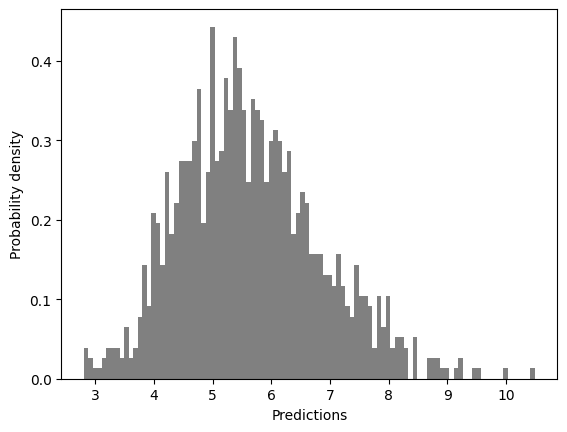

In [27]:
#plot predictive distribution
sample=1

y_train_pred_n_times

fig, ax = plt.subplots()
num_bins = 100
# the histogram of the actual error distribution
n, bins, patches = ax.hist(y_train_pred_n_times[sample].flatten(), num_bins, density=True, label='Observed histogram', color='gray')
ax.set_xlabel('Predictions')
ax.set_ylabel('Probability density')

In [28]:
eval_dict={'model':[], 'rmse_train_all':[], 'rmse_train_crit1':[],'rmse_train_crit2':[],'rmse_train_crit3':[],'rmse_train_crit4':[]}

In [29]:
eval_dict['model'].append(model_name)


In [30]:
#### Calculate comparion matrics
#
#all
rmse_train_all = calculate_rmse(y_train_np, y_train_mean_pred_np)
eval_dict['rmse_train_all'].append(rmse_train_all)
#critical 1 range (0.5-1.5)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=0.5, ub=1.5)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict['rmse_train_crit1'].append(rmse)
#critical 2 range (1.5-3)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=1.5, ub=3)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict['rmse_train_crit2'].append(rmse)
#critical 3 range (3-10)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=2, ub=10)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict['rmse_train_crit3'].append(rmse)
#critical 4 range (10-500)
filtered_y_np, filtered_y_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=10, ub=500)
rmse = calculate_rmse(filtered_y_np, filtered_y_mean_pred_np)
eval_dict['rmse_train_crit4'].append(rmse)

print(eval_dict)

{'model': ['1001_no0_small_cost_100_1'], 'rmse_train_all': [8.9359898768321], 'rmse_train_crit1': [2.988327905062196], 'rmse_train_crit2': [3.6258613596364277], 'rmse_train_crit3': [4.653994737475291], 'rmse_train_crit4': [12.684401427796546]}


: 

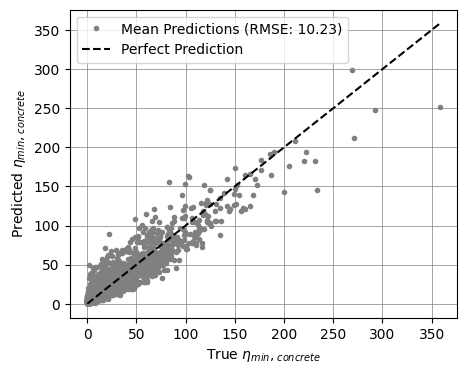

In [169]:
###### Calulate Metrics and Plot #######

# Calculate rmse
rmse_train = calculate_rmse(y_train_np, y_train_mean_pred_np)
# print("Root Mean Squared Error (RMSE):", rmse_train)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=y_train_np, y_pred=y_train_mean_pred_np, rmse_value=rmse_train, y_name='$\eta_{min},_{concrete}$' )

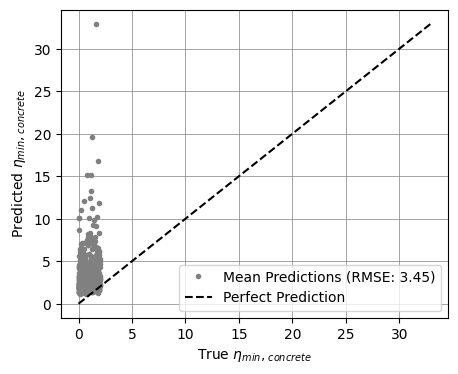

In [170]:
###### Calulate Metrics and Plot: For Critical Range #######

# Define the range
lower_bound = 0
upper_bound = 2

filtered_y_train_np, filtered_y_train_mean_pred_np=filter_values_within_range(y_true=y_train_np, y_pred=y_train_mean_pred_np, lb=lower_bound, ub=upper_bound)

# Calculate rmse
rmse_train_filtered = calculate_rmse(filtered_y_train_np, filtered_y_train_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=filtered_y_train_np, y_pred=filtered_y_train_mean_pred_np, rmse_value=rmse_train_filtered, 
                    y_name='$\eta_{min},_{concrete}$' )



Text(0, 0.5, 'Probability density')

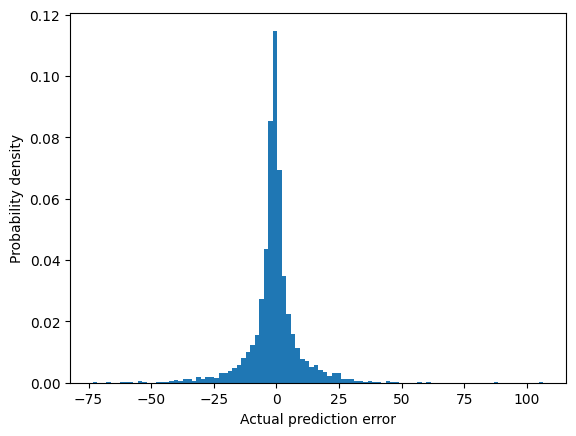

In [171]:
# calculating errors of the average model and plot them
errors=y_train_np - y_train_mean_pred_np

fig, ax = plt.subplots()
num_bins = 100
# the histogram of the actual error distribution
n, bins, patches = ax.hist(errors.flatten(), num_bins, density=True, label='Observed histogram')
ax.set_xlabel('Actual prediction error')
ax.set_ylabel('Probability density')

In [172]:
# Evaluation of Uncertanty Calibration 

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Define a range of confidence levels
confidence_levels = np.linspace(0, 1, 100)
coverages = []

# Compute prediction intervals (e.g., 95% confidence intervals) (Assumption that the predictive distribution is a normal dirtsibution)
for confidence_level in confidence_levels:
    z = norm.ppf((1 + confidence_level) / 2)  # z-score for the confidence level
    prediction_intervals = np.array([
        [meanPred - z * std, meanPred + z * std]
        for meanPred, std in zip(y_train_mean_pred_np, y_train_std_pred_np)
    ])

    # Check if actual values fall within prediction intervals
    within_intervals = np.array([
        interval[0] <= y_true <= interval[1]
        for interval, y_true in zip(prediction_intervals, y_train_np)
    ])
    
    # Proportion of times actual values fall within prediction intervals
    coverage = np.mean(within_intervals)
    coverages.append(coverage)

print(coverages)

[0.0, 0.0039001560062402497, 0.006500260010400416, 0.007280291211648466, 0.011180447217888715, 0.013780551222048881, 0.015860634425377017, 0.01846073842953718, 0.021320852834113363, 0.02392095683827353, 0.02704108164326573, 0.030681227249089962, 0.03406136245449818, 0.0374414976599064, 0.039781591263650544, 0.0421216848673947, 0.04472178887155486, 0.04758190327613104, 0.05070202808112324, 0.05382215288611544, 0.056162246489859596, 0.057982319292771714, 0.06006240249609984, 0.06448257930317212, 0.06760270410816432, 0.07254290171606864, 0.07540301612064483, 0.07722308892355695, 0.08034321372854915, 0.08242329693187728, 0.0845033801352054, 0.08710348413936557, 0.08970358814352575, 0.09178367134685388, 0.09542381695267811, 0.09880395215808632, 0.10192407696307852, 0.10530421216848673, 0.10894435777431097, 0.1125845033801352, 0.11648465938637545, 0.1188247529901196, 0.12272490899635985, 0.12688507540301613, 0.13052522100884034, 0.13364534581383256, 0.13676547061882474, 0.13988559542381696, 

In [174]:
from sklearn.metrics import mean_squared_error
# Calculate Brier score
brier_score = mean_squared_error(confidence_levels, coverages)
print("Brier score:", brier_score)

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(confidence_levels - coverages))
print("Expected Calibration Error (ECE):", ece)

# Calculate Total Calibration Error (TCE)
tce = np.sum(np.abs(confidence_levels - coverages))
print("Total Calibration Error (TCE):", tce)

# Calculate Bias (Positive for Overconfidence, Negative for Underconfidence)
bias = np.sum(confidence_levels - coverages)
print("Calibration Bias:", bias)

Brier score: 0.13357149153518422
Expected Calibration Error (ECE): 0.32175767030681235
Total Calibration Error (TCE): 32.175767030681236
Calibration Bias: 32.175767030681236


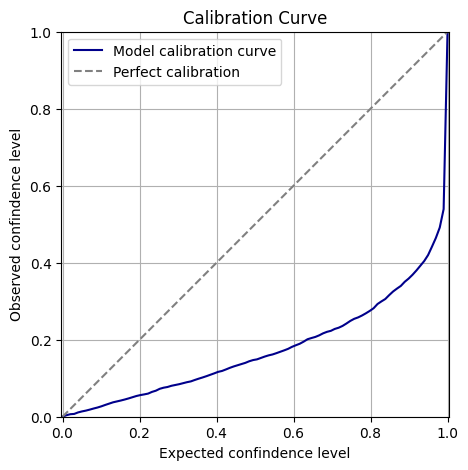

In [175]:
# Plot the calibration curve
plt.figure(figsize=(5, 5))
plt.plot(confidence_levels, coverages,  label='Model calibration curve', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration',color='gray')
# plt.plot(p_pred, p_obs, label='Model calibration curve')
# plt.plot([0,1],[0,1], 'k--', alpha=0.6, label='Ideal calibration curve')
plt.xlabel('Expected confindence level')
plt.ylabel('Observed confindence level')
plt.title('Calibration Curve')
plt.axis('equal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.grid(True)
plt.show()

In [176]:
# # TODO: Implementation in a function of uncertanty calibration calulation 
# # BUT for some reason this runs 2 minutes, while the not function code runs 10 seconds...correct this 
# # the results seem to be the same...

# import numpy as np
# from scipy.stats import norm

# # Define the function to calculate a confidence interval for a normal distribution
# def calc_confidence_interval_snorm(confidence_level, mean_pred, std_pred):
#     z = norm.ppf((1 + confidence_level) / 2)  # z-score for the confidence level
#     confidence_interval = [mean_pred - z * std_pred, mean_pred + z * std_pred]

#     return confidence_interval

# # Define the function to calculate the cobserved confidence level (coverage)
# def calc_observed_confidence(confidence_level, y_pred_mean, y_pred_std, y_true):
#     confidence_intervals = np.array([
#         calc_confidence_interval_snorm(confidence_level, mean_pred, std_pred)
#         for mean_pred, std_pred in zip(y_pred_mean, y_pred_std)
#     ])

#     # Check if actual values fall within prediction intervals
#     within_intervals = np.array([
#         interval[0] <= true_val <= interval[1]
#         for interval, true_val in zip(confidence_intervals, y_true)
#     ])

#     coverage = np.mean(within_intervals)
#     return coverage



# # Define a range of confidence levels
# confidence_levels = np.linspace(0, 1, 100)
# coverages = []

# # Compute prediction intervals and check coverage
# for confidence_level in confidence_levels:
#     coverage = calc_observed_confidence(confidence_level, y_train_mean_pred_np, y_train_std_pred_np, y_train_np)
#     coverages.append(coverage)

# print("Coverages for each confidence level:", coverages)

In [177]:
# from fitter import Fitter
#Idea: with current uncertanty callibaration we assume a stand. normal distribution for our model predictions to calculate the confidence interval
# one could also do this more accurately, so fit a distribution to the predicted distributin and calculate confidence intervalls from that distribution
# or take the n predictions, and find (iteratively) the confidence intervals (timeconsuming?)

# f = Fitter(y_train_pred_n_times[1],
#            distributions=['gamma',
#                           'lognorm',
#                           "beta",
#                           "burr",
#                           "norm"])
# f.fit()
# f.summary()
# f.get_best(method = 'sumsquare_error')

#### on the validation data:

In [178]:
##### make predictions ####
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_val_mean_pred_np, y_val_std_pred_np, y_val_pred_n_times = bnn_predict_with_uncertainty(model, x_val_scaled_tensor, n=n_predictions,log_transform_back=False)
y_val_mean_pred_np

array([[  1.733945 ],
       [  1.7506012],
       [ 52.869686 ],
       [  7.0906825],
       [  6.8712783],
       [  6.2022448],
       [  8.570539 ],
       [ 33.940178 ],
       [ 23.885635 ],
       [ 63.155697 ],
       [  2.6400375],
       [ 28.12602  ],
       [ 37.474613 ],
       [ 73.99594  ],
       [  1.3836983],
       [  2.1262205],
       [ 41.441708 ],
       [ 10.407824 ],
       [ 35.755238 ],
       [  9.182764 ],
       [ 14.18494  ],
       [ 29.107243 ],
       [  6.685328 ],
       [  2.2779088],
       [  2.2847252],
       [ 13.402719 ],
       [  4.2657356],
       [  9.889977 ],
       [ 73.10469  ],
       [  4.7586193],
       [ 32.732822 ],
       [  2.4807622],
       [  2.6155038],
       [ 13.734191 ],
       [  1.8616139],
       [ 14.5686655],
       [  3.9727192],
       [ 34.778618 ],
       [  7.580394 ],
       [ 31.736591 ],
       [  8.403648 ],
       [ 80.477486 ],
       [  4.677161 ],
       [ 43.79071  ],
       [  6.253422 ],
       [  

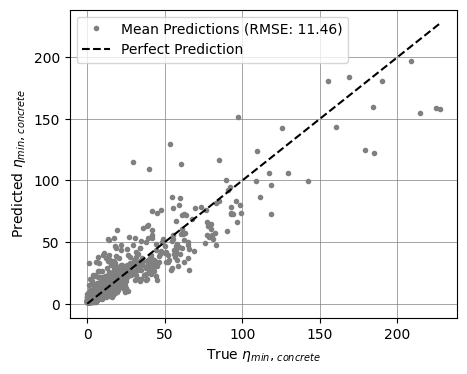

In [179]:
###### Calulate Metrics and Plot #######

# Calculate rmse
rmse_val = calculate_rmse(y_val_np, y_val_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=y_val_np, y_pred=y_val_mean_pred_np, rmse_value=rmse_val, y_name='$\eta_{min},_{concrete}$' )

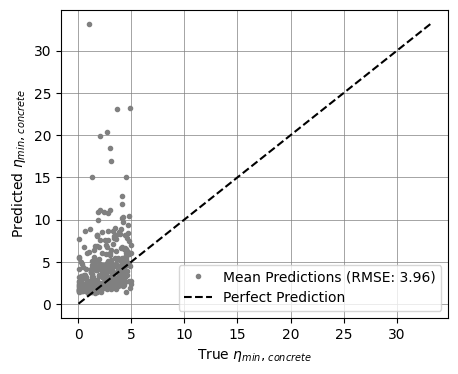

In [180]:
###### Calulate Metrics and Plot: For Critical Range #######

# Define the range
lower_bound = 0
upper_bound = 5

filtered_y_val_np, filtered_y_val_mean_pred_np=filter_values_within_range(y_true=y_val_np, y_pred=y_val_mean_pred_np, lb=lower_bound, ub=upper_bound)

# Calculate rmse
rmse_val_filtered = calculate_rmse(filtered_y_val_np, filtered_y_val_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=filtered_y_val_np, y_pred=filtered_y_val_mean_pred_np, rmse_value=rmse_val_filtered, 
                    y_name='$\eta_{min},_{concrete}$' )

In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# Define a range of confidence levels
confidence_levels = np.linspace(0, 1, 100)
coverages = []

# Compute prediction intervals (e.g., 95% confidence intervals) (Assumption that the predictive distribution is a normal dirtsibution)
for confidence_level in confidence_levels:
    z = norm.ppf((1 + confidence_level) / 2)  # z-score for the confidence level
    prediction_intervals = np.array([
        [meanPred - z * std, meanPred + z * std]
        for meanPred, std in zip(y_val_mean_pred_np, y_val_std_pred_np)
    ])

    # Check if actual values fall within prediction intervals
    within_intervals = np.array([
        interval[0] <= y_true <= interval[1]
        for interval, y_true in zip(prediction_intervals, y_val_np)
    ])
    
    # Proportion of times actual values fall within prediction intervals
    coverage = np.mean(within_intervals)
    coverages.append(coverage)

print(coverages)

[0.0, 0.0031185031185031187, 0.005197505197505198, 0.006237006237006237, 0.007276507276507277, 0.011434511434511435, 0.012474012474012475, 0.015592515592515593, 0.016632016632016633, 0.02079002079002079, 0.02182952182952183, 0.02494802494802495, 0.034303534303534305, 0.036382536382536385, 0.0395010395010395, 0.04365904365904366, 0.0498960498960499, 0.0498960498960499, 0.05197505197505198, 0.05301455301455302, 0.0550935550935551, 0.059251559251559255, 0.061330561330561334, 0.062370062370062374, 0.06548856548856549, 0.06860706860706861, 0.07068607068607069, 0.07068607068607069, 0.07276507276507277, 0.07692307692307693, 0.08108108108108109, 0.08316008316008316, 0.0893970893970894, 0.0945945945945946, 0.09771309771309772, 0.10083160083160084, 0.10291060291060292, 0.10810810810810811, 0.1101871101871102, 0.11746361746361747, 0.12058212058212059, 0.12370062370062371, 0.12681912681912683, 0.13097713097713098, 0.13305613305613306, 0.1340956340956341, 0.13513513513513514, 0.13617463617463618, 0

In [182]:
from sklearn.metrics import mean_squared_error
# Calculate Brier score
brier_score = mean_squared_error(confidence_levels, coverages)
print("Brier score:", brier_score)

# Calculate Expected Calibration Error (ECE)
ece = np.mean(np.abs(confidence_levels - coverages))
print("Expected Calibration Error (ECE):", ece)

# Calculate Total Calibration Error (TCE)
tce = np.sum(np.abs(confidence_levels - coverages))
print("Total Calibration Error (TCE):", tce)

# Calculate Bias (Positive for Overconfidence, Negative for Underconfidence)
bias = np.sum(confidence_levels - coverages)
print("Calibration Bias:", bias)

Brier score: 0.1293759406805145
Expected Calibration Error (ECE): 0.3179106029106029
Total Calibration Error (TCE): 31.791060291060294
Calibration Bias: 31.791060291060294


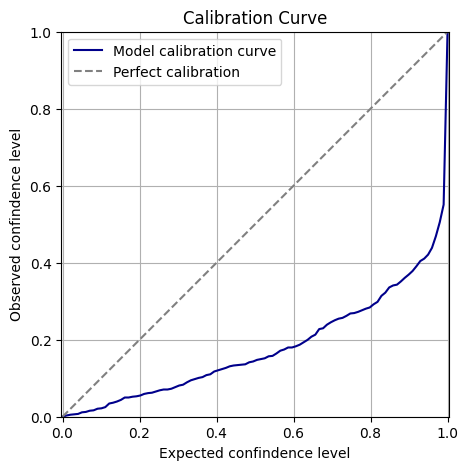

In [183]:
# Plot the calibration curve
plt.figure(figsize=(5, 5))
plt.plot(confidence_levels, coverages,  label='Model calibration curve', color='darkblue')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfect calibration',color='gray')
# plt.plot(p_pred, p_obs, label='Model calibration curve')
# plt.plot([0,1],[0,1], 'k--', alpha=0.6, label='Ideal calibration curve')
plt.xlabel('Expected confindence level')
plt.ylabel('Observed confindence level')
plt.title('Calibration Curve')
plt.axis('equal')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.grid(True)
plt.show()

#### on test data

In [184]:
##### make predictions ####
# Define number of predictions
n_predictions = 1000

# Perfrom multiple predictions on data --> get mean and std for each data point
y_test_mean_pred_np, y_test_std_pred_np, y_test_pred_n_times = bnn_predict_with_uncertainty(model, x_test_scaled_tensor, n=n_predictions,log_transform_back=False)
y_test_mean_pred_np

array([[26.173717 ],
       [ 9.648551 ],
       [10.251469 ],
       ...,
       [79.937004 ],
       [ 8.500128 ],
       [ 5.9153075]], dtype=float32)

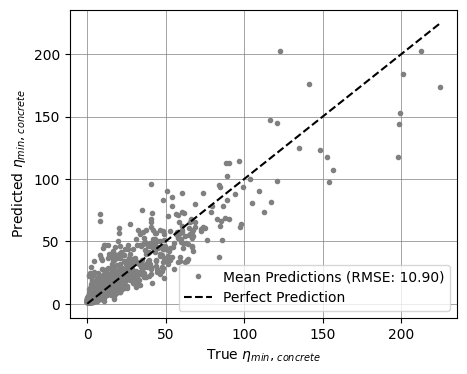

In [185]:
###### Calulate Metrics and Plot #######

# Calculate rmse
rmse_test = calculate_rmse(y_test_np, y_test_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=y_test_np, y_pred=y_test_mean_pred_np, rmse_value=rmse_test, y_name='$\eta_{min},_{concrete}$' )

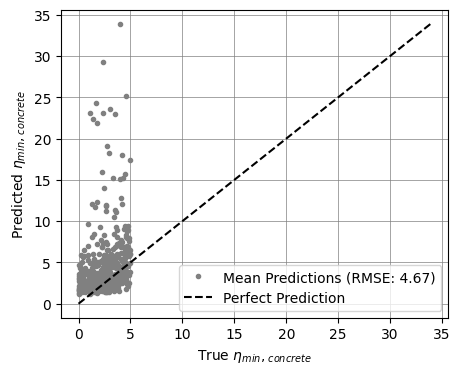

In [186]:
###### Calulate Metrics and Plot: For Critical Range #######

# Define the range
lower_bound = 0
upper_bound = 5

filtered_y_test_np, filtered_y_test_mean_pred_np=filter_values_within_range(y_true=y_test_np, y_pred=y_test_mean_pred_np, lb=lower_bound, ub=upper_bound)

# Calculate rmse
rmse_test_filtered = calculate_rmse(filtered_y_test_np, filtered_y_test_mean_pred_np)

#plot True vs Pred Plot
plot_true_vs_pred(y_true=filtered_y_test_np, y_pred=filtered_y_test_mean_pred_np, rmse_value=rmse_test_filtered, 
                    y_name='$\eta_{min},_{concrete}$' )

## 5.  1D Parameter study validation

Here we plot the 1D paraemter studies calculated with the parameteric NLFE-Analysis-Pipeline against the mean prediction of the trained BNN model. Additionally we plot the uncertanty of the prediction.



In [187]:
def plot_1DParameter_ValidationStudy(df,mean_pred, std_pred, var_par,  unit, idx_s, eta):
    cm = 1/2.54

    fig, ax = plt.subplots(figsize=(25*cm,15*cm))

    #Bending
    ax.plot(df[var_par], df[eta], label='Concrete NLFE-Analysis', marker='x', color='black')

    #Prediction
    ax.plot(df[var_par], mean_pred[:,0], label='Concrete Mean Model \nPrediction', marker='.', color='green')

    #Confidence
    ax.fill_between(df[var_par], mean_pred[:,0] - 3*std_pred[:,0], mean_pred[:,0] + 3*std_pred[:,0], label = "99.7% Confidence interval \nConcrete", color = "green", alpha = 0.3)

    #TODO later if we have also shear and reinforcement eta model plot all in one (only ms=1)??
    # #Shear
    # ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear'],label='Shear stress (ms=1t)', marker='o', color='orangered')
    # ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear_reduced'],label='Shear stress within bounds   \n(ms=1t)', marker='o', color='deeppink')

    ax.set(xlabel=var_par+unit, ylabel='$\eta \ min$ [-]',
        title='Concrete Frame Bridge, Studie {}'.format(idx_s))


    # upper_lim = 25
    # ax.set_ylim(bottom=0,top=upper_lim)
    ax.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\eta=1$')

    ax.set_xticks(df[var_par])
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=45)

    #ax.set_yticks(np.linspace(0,upper_lim,11))

    ax.grid()
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    fig.tight_layout()

In [188]:
def validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta, n_predictions=100):

    # get 1D parameter study data
    xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s,idx_s)
    df_xy=pd.read_csv(xy_file_name)
    #print(df_xy)

    #Extract features
    x_df=df_xy[x_names]

    #Scale them
    x_scaled_np = scaler.transform(x_df)
    x_scaled_df=pd.DataFrame(data=x_scaled_np, columns=scaler.get_feature_names_out())

    #transform into tensor
    x_1D_tensor=torch.tensor(x_scaled_df.values, dtype=torch.float32)

    ##### make predictions ####
    # Perfrom multiple predictions on data --> get mean and std for each data point
    val_mean_pred_1d, val_std_pred_1d, y_val_pred_n_times_1d = bnn_predict_with_uncertainty(model, x_1D_tensor, n=n_predictions)


    #plot
    plot_1DParameter_ValidationStudy(df=df_xy,mean_pred=val_mean_pred_1d, std_pred=val_std_pred_1d, var_par=var_par,  unit=unit, idx_s=idx_s, eta=eta)

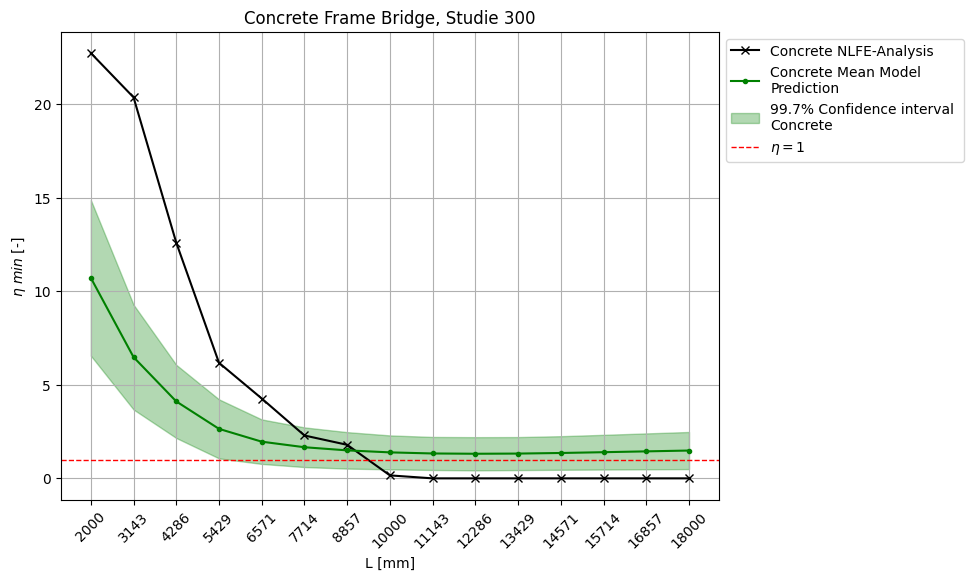

In [189]:
idx_s=300
var_par='L'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

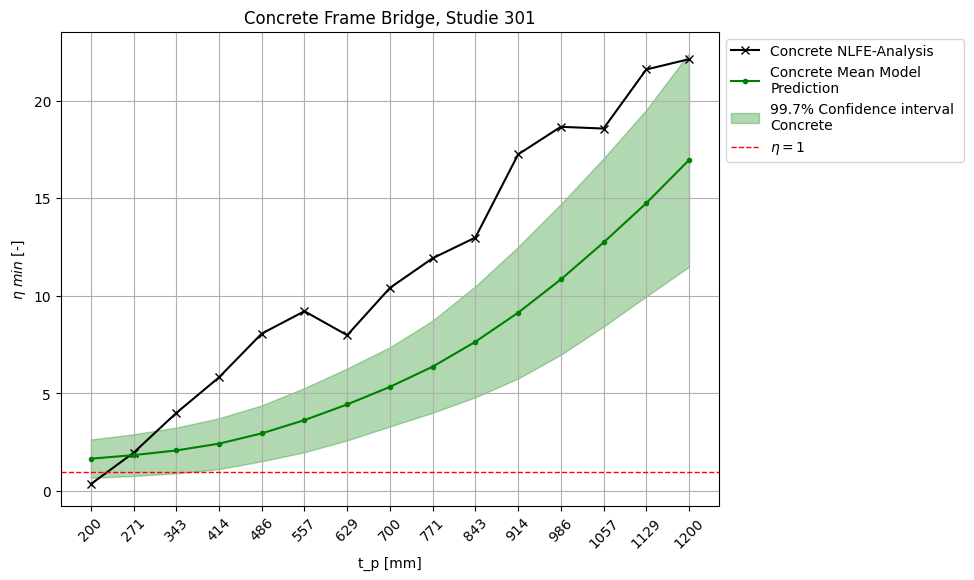

In [190]:
idx_s=301
var_par='t_p'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

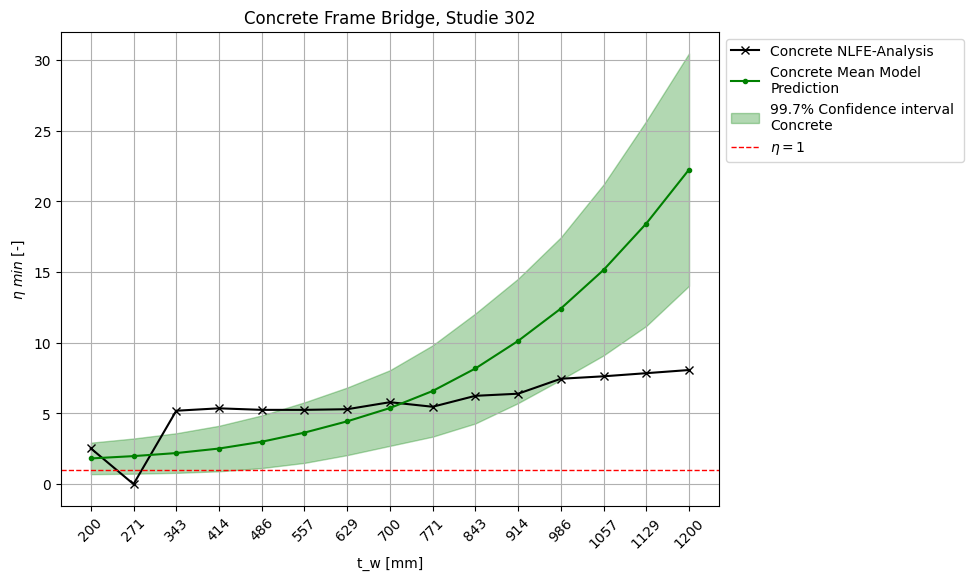

In [191]:
idx_s=302
var_par='t_w'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

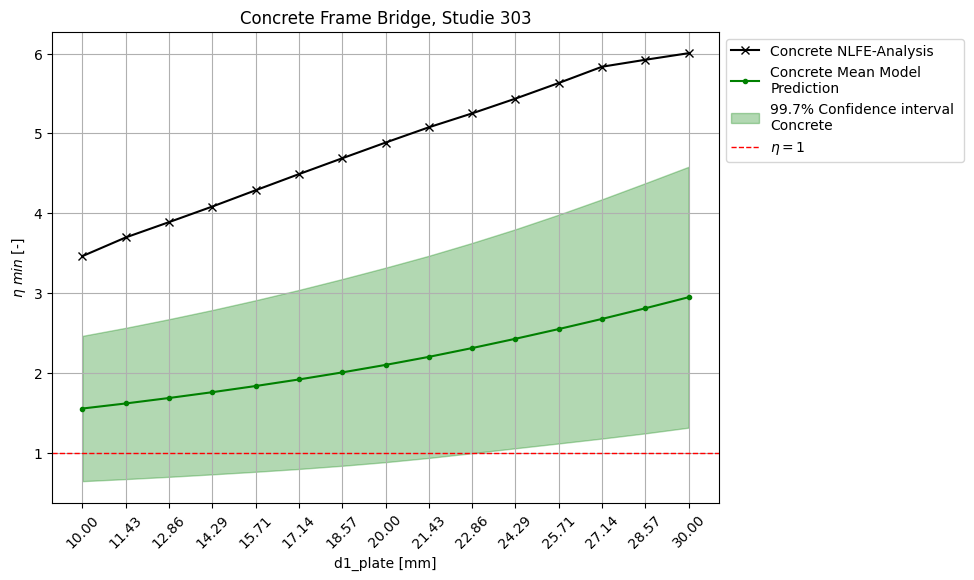

In [192]:
idx_s=303
var_par='d1_plate'
unit=' [mm]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

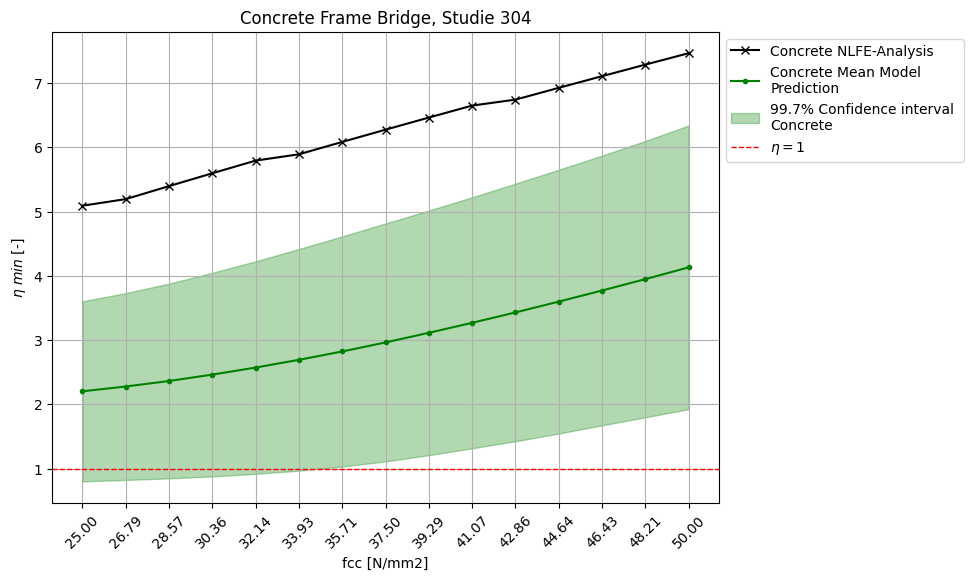

In [193]:
idx_s=304
var_par='fcc'
unit=' [N/mm2]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

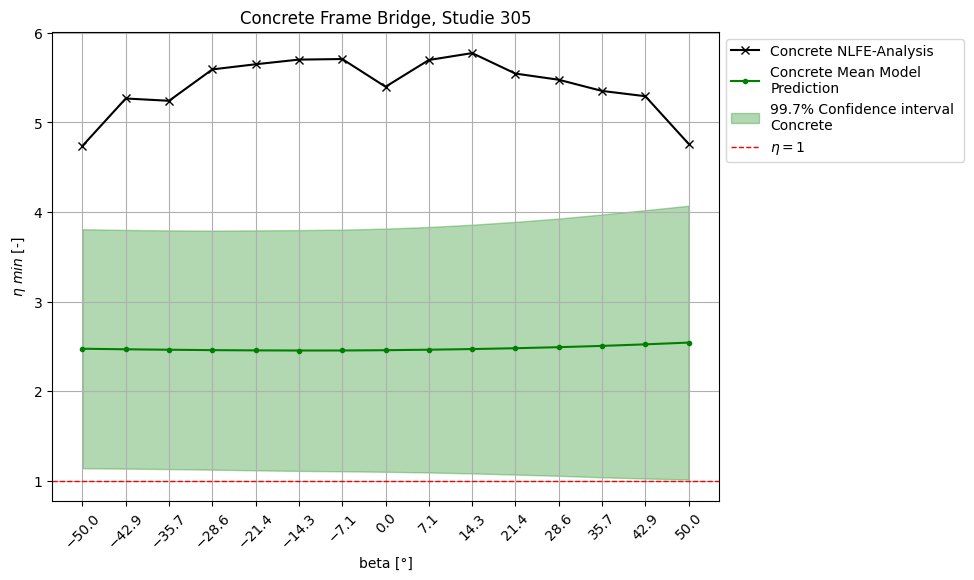

In [194]:
idx_s=305
var_par='beta'
unit=' [°]'
eta='eta_min_c'

validation_1DParameter_study(idx_s, x_names, scaler, model, var_par,  unit, eta)

# FROM HERE below noch nicht aufgeräumt

In [59]:
idx_s1=305

step='step_4'
var_par='beta'
unit=' [mm]'

df_xy_1=None

xy_file_name='CFBData\\{}_Batch\\{}_CFB_xy.csv'.format(idx_s1,idx_s1)

df_xy_1=pd.read_csv(xy_file_name)
df_xy_1

,Unnamed: 0,ID,beta,L,b1,t_p,t_w,h_w,alpha_l,h_v,...,x_c_shear_reduced,y_c_shear_reduced,z_c_shear_reduced,Location_c_shear_reduced,element_count_shear_reduced,eta_min_c_stresses,x_c_stresses,y_c_stresses,z_c_stresses,Location_c_stresses
0,0,0,-50.000000,5800,9720,400,400,2780,90,0,...,178.2,5221.8,0.0,bot,3,2.655827,75.316185,5324.683594,-352.941162,eta_y_bot_stresses
1,1,1,-42.857143,5800,9720,400,400,2780,90,0,...,178.2,5221.8,0.0,bot,4,2.916380,75.316185,5118.916016,-352.941162,eta_y_bot_stresses
2,2,2,-35.714286,5800,9720,400,400,2780,90,0,...,891.0,5221.8,0.0,bot,4,2.897423,3488.683838,75.316185,-352.941162,eta_y_bot_stresses
3,3,3,-28.571429,5800,9720,400,400,2780,90,0,...,1960.2,5221.8,0.0,bot,0,3.070467,3845.083740,75.316185,-352.941162,eta_y_bot_stresses
4,4,4,-21.428571,5800,9720,400,400,2780,90,0,...,2673.0,5221.8,0.0,bot,0,3.098937,4201.483887,75.316185,-352.941162,eta_y_bot_stresses
5,5,5,-14.285714,5800,9720,400,400,2780,90,0,...,3385.8,5221.8,0.0,bot,0,3.124639,4352.116211,75.316185,-352.941162,eta_y_bot_stresses
6,6,6,-7.142857,5800,9720,400,400,2780,90,0,...,3742.2,5221.8,0.0,bot,0,3.127893,4557.883789,75.316185,-352.941162,eta_y_bot_stresses
7,7,7,0.000000,5800,9720,400,400,2780,90,0,...,4811.4,5221.8,0.0,bot,0,2.974671,4708.516113,75.316185,-352.941162,eta_y_bot_stresses
8,8,8,7.142857,5800,9720,400,400,2780,90,0,...,5880.6,5221.8,0.0,bot,0,3.122361,5064.916016,75.316185,-352.941162,eta_y_bot_stresses
9,9,9,14.285714,5800,9720,400,400,2780,90,0,...,6237.0,5221.8,0.0,bot,0,3.161110,5270.683594,75.316185,-352.941162,eta_y_bot_stresses


In [55]:
#Extract features
x_df=df_xy_1[x_names]

#Scale them
x_scaled_np = scaler.transform(x_df)
x_scaled_df=pd.DataFrame(data=x_scaled_np, columns=scaler.get_feature_names_out())

#transform into tensor
x_1D_tensor=torch.tensor(x_scaled_df.values, dtype=torch.float32)

In [57]:
##### make predictions ####
# Define number of predictions
n_predictions = 3

# Perfrom multiple predictions on data --> get mean and std for each data point
val_mean_pred_1d, val_std_pred_1d, y_val_pred_n_times_1d = bnn_predict_with_uncertainty(model, x_1D_tensor, n=n_predictions)

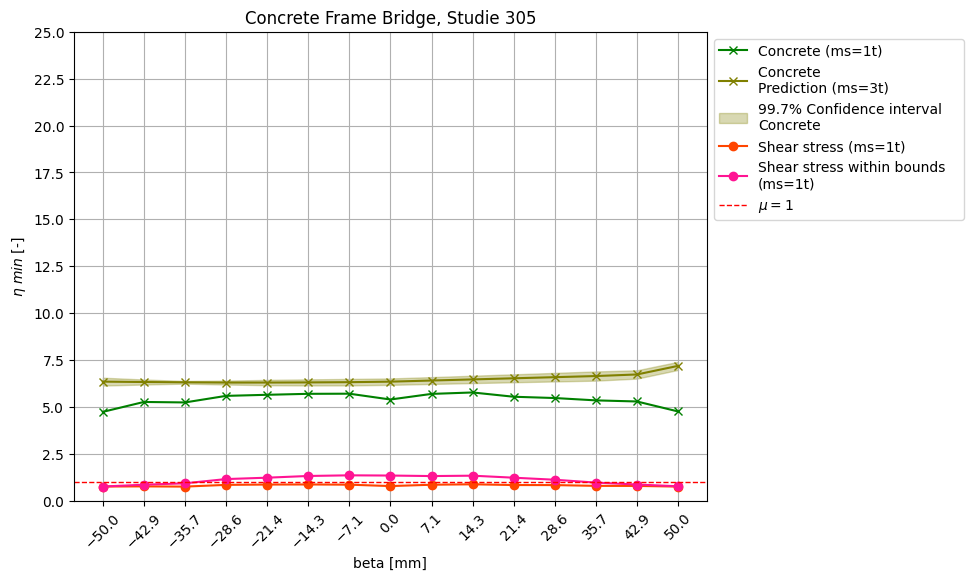

In [58]:
cm = 1/2.54

fig, ax = plt.subplots(figsize=(25*cm,15*cm))

#Bending
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_c'], label='Concrete (ms=1t)', marker='x', color='green')

#Prediction
ax.plot(df_xy_1[var_par], val_mean_pred_1d[:,0], label='Concrete \nPrediction (ms=3t)', marker='x', color='olive')

#Confidence
ax.fill_between(df_xy_1[var_par], val_mean_pred_1d[:,0] - 3*val_std_pred_1d[:,0], val_mean_pred_1d[:,0] + 3*val_std_pred_1d[:,0], label = "99.7% Confidence interval \nConcrete", color = "olive", alpha = 0.3)

#Shear
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear'],label='Shear stress (ms=1t)', marker='o', color='orangered')
ax.plot(df_xy_1[var_par], df_xy_1['eta_min_shear_reduced'],label='Shear stress within bounds   \n(ms=1t)', marker='o', color='deeppink')

ax.set(xlabel=var_par+unit, ylabel='$\eta \ min$ [-]',
       title='Concrete Frame Bridge, Studie {}'.format(idx_s1))

upper_lim = 25

ax.set_ylim(bottom=0,top=upper_lim)
ax.axhline(y=1, color='red', linestyle='--', linewidth=1, label='$\mu=1$')

ax.set_xticks(df_xy_1[var_par])
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=45)

ax.set_yticks(np.linspace(0,upper_lim,11))

ax.grid()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
fig.tight_layout()

## 5.  1D Parameter study validation

Here we plot the 1D paraemter studies calculated with the parameteric NLFE-Analysis-Pipeline against the mean prediction of the trained BNN model. Additionally we plot the uncertanty of the prediction.

# FROM HERE below noch nicht aufgeräumt
#TODO ADD Antoines Validation plots here and add parameterstudie zu data folder

##### L-Parameter study

In [275]:
#import validation data
df_1d_L=pd.read_csv("TestData\\601_CFB_xy.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'TestData\\601_CFB_xy.csv'

In [25]:
x_data_1d=df_1d_L[x_names]
x_tensor_1d=torch.tensor(x_data_1d.values, dtype=torch.float32)

y_data_1d=df_1d_L[y_names]
y_tensor_1d = torch.tensor(y_data_1d.values,dtype=torch.float32)


x_data_1d.head()

NameError: name 'df_1d_L' is not defined

In [379]:
## normalise imoirted data
# Convert tensors to numpy arrays
x_data_1d_to_scale = x_tensor_1d.numpy()


# Scale the validation data using the same scaler as for fitted for the trainings set
x_data_1d_scaled = scaler.transform(x_data_1d_to_scale)

# Convert the scaled arrays back to tensors
x_tensor_1d_scaled = torch.tensor(x_data_1d_scaled, dtype=torch.float32)


print(x_tensor_1d_scaled)
print(y_tensor_1d)

tensor([[-1.0651e-04,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.0305e-02,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 4.0718e-02,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 6.1130e-02,  3.9531e-01,  2.0000e-01,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 8.1542e-02

c:\Users\kuhnso\AppData\Local\anaconda3\envs\BNNs\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [380]:
from model import predict
mean_values, std_values=predict(model=model, x_scaled=x_tensor_1d_scaled, n=10000)

In [381]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)

rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, verbalize=True)
rmse_range=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, y_range=(0,5), verbalize=True)


Root Mean Squared Error (RMSE): 2.4198782444000244
A range is provided.
Root Mean Squared Error (RMSE): 1.6105395555496216


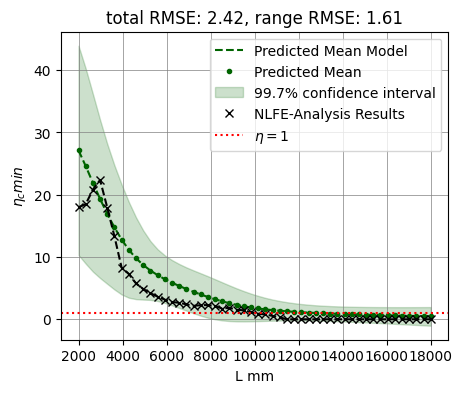

In [382]:
from plotting import single_para_strudy_perf

#x=torch.unsqueeze(x_tensor_1d[:, 2], dim=1).data.numpy()
variable='L'
unit='mm'
x=np.array(x_data_1d[variable]).reshape(-1,1)
y_pred=mean_values.reshape(-1,1)
y_true=y_tensor_1d.data.numpy()
y_std=std_values.reshape(-1,1)

single_para_strudy_perf(x, y_pred, y_true, y_std, variable=variable, unit=unit, rmse=rmse.item(),rmse_range=rmse_range.item())

##### t_p-Parameter study

In [383]:
#import validation data
df_1d_tp=pd.read_csv("TestData\\602_CFB_xy.csv")

x_data_1d=df_1d_tp[x_names]
x_tensor_1d=torch.tensor(x_data_1d.values, dtype=torch.float32)

y_data_1d=df_1d_tp[y_names]
y_tensor_1d = torch.tensor(y_data_1d.values,dtype=torch.float32)


x_tensor_1d

tensor([[5.8000e+03, 9.7200e+03, 2.0000e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.2041e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.4082e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.6122e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000e+02, 1.4000e+01, 2.4000e+01, 2.0000e+02,
         1.2800e+01, 1.8179e-01, 5.0000e+00, 1.0000e+03],
        [5.8000e+03, 9.7200e+03, 2.8163e+02, 4.0000e+02, 2.5800e+03, 2.4000e+01,
         2.4000e+01, 1.2000e+01, 2.0000

In [384]:
## normalise imoirted data
# Convert tensors to numpy arrays
x_data_1d_to_scale = x_tensor_1d.numpy()


# Scale the validation data using the same scaler as for fitted for the trainings set
x_data_1d_scaled = scaler.transform(x_data_1d_to_scale)

# Convert the scaled arrays back to tensors
x_tensor_1d_scaled = torch.tensor(x_data_1d_scaled, dtype=torch.float32)


print(x_tensor_1d_scaled)
print(y_tensor_1d)

tensor([[ 2.3744e-01,  3.9531e-01, -6.5972e-05,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01,  3.9531e-01,  2.0349e-02,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01,  3.9531e-01,  4.0763e-02,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01,  3.9531e-01,  6.1178e-02,  2.0002e-01,  1.9319e-01,
          7.0003e-01,  6.9997e-01,  9.9865e-02,  2.4992e-01,  1.9997e-01,
          7.0002e-01,  2.4997e-01, -4.8801e-01,  1.0217e-01,  5.5000e-01,
          5.8331e-01],
        [ 2.3744e-01

c:\Users\kuhnso\AppData\Local\anaconda3\envs\BNNs\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [385]:
from model import predict
mean_values, std_values=predict(model=model, x_scaled=x_tensor_1d_scaled, n=1000)

In [386]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)

rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, verbalize=True)
rmse_range=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, y_range=(0,5), verbalize=True)


Root Mean Squared Error (RMSE): 6.240512847900391
A range is provided.
Root Mean Squared Error (RMSE): 3.5423126220703125


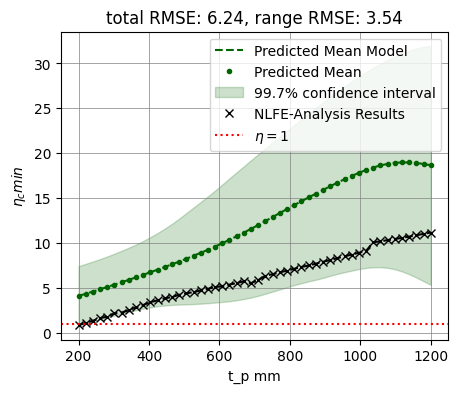

In [387]:
from plotting import single_para_strudy_perf

variable='t_p'
unit='mm'
x=np.array(x_data_1d[variable]).reshape(-1,1)
y_pred=mean_values.reshape(-1,1)
y_true=y_tensor_1d.data.numpy()
y_std=std_values.reshape(-1,1)

single_para_strudy_perf(x, y_pred, y_true, y_std, variable=variable, unit=unit, rmse=rmse.item(),rmse_range=rmse_range.item())